### K-Nearest Neighbors for Image Processing

In [25]:
'''
This script does image categorization using the K-Nearest Neighbors technique by utilizing scikit-learn. 
The first step is to import the required libraries, which include PIL, numpy, and matplotlib. After that, a KNN classifier is trained, image files are loaded via glob and arranged into a matrix. It uses the metrics provided by scikit-learn to assess the classifier's accuracy after training. Image conversion to numpy arrays, reshaping, and feature extraction are the steps in the procedure. With flexibility for experimentation and optimization, 
this script offers a fundamental framework for KNN-based image categorization applications.
'''

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from PIL import Image 
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import glob

#utilizing sklearn for the KNN classifier and accuracy metrics and glob to retrieve file directories

#### 1. Setup Image Arrays

In [26]:
'''
Two lists are being created by these lines of code: `glucoma_} and `normal_}. To identify all file paths that match the provided patterns, use the `glob` module. In particular, all files in the "normal" directory are found by `glob.glob('normal/*')}, and all files in the "glaucoma" directory are found by `glob.glob('glaucoma/*')}. The file path is inserted to the corresponding list (`glucoma_} for glaucoma images and `normal_} for normal images) for each file that is detected.
The photos for categorization will then be loaded and processed using these lists.

'''

normal_ = []
glucoma_ = []


#Loop through all files in the 'normal' directory
for normal in glob.glob('normal/*'):
    normal_.append(normal)

    #Loop through all files in the 'normal' directory
for glucoma in glob.glob('glaucoma/*'):
    glucoma_.append(glucoma)

In [27]:
print ("#normal, #glucoma", len(normal_), len(glucoma_))

#normal, #glucoma 38 13


#### 2. Setup list of files and build a single list (aka flat list) of lists

In [28]:
'''
This section creates a list named `all_images`. `normal_} and `glucoma_} are the two sub-lists that are then added to this list. File paths to images are stored in each of these sub-lists; paths to images of normal eyes are stored in `normal_}, while paths to photos of glaucoma eyes are stored in `glucoma_}. The script is getting ready to process and classify both kinds of photos together by appending these two sub-lists to `all_images`. 
It is simple to iterate through all of the picture paths for the following processing steps thanks to this arrangement.
'''

all_images = []
all_images.append(normal_)
all_images.append(glucoma_)

In [29]:
'''
In this snippet, the `reduce` function from the `functools` module is used in combination with `operator.add` to concatenate all the sub-lists within `all_images` into a single list. This means that instead of having two separate lists (`normal_` and `glucoma_`), all the file paths to both types of images are now combined into one list named `all_images`. 
This unified list simplifies the process of iterating through all image paths for subsequent operations such as loading and processing the images.
'''

import operator
from functools import reduce
all_images = reduce(operator.add, all_images)

In [30]:
'''
In order to extract matching labels for categorization, the script runs over a list of picture paths. Before splitting the paths to separate the labels, it first collects filenames without extensions from each picture path. After removing the trailing numbers, the labels are added to a list called `all_labels`. 
This gives the images' labels, which is useful for supervised learning tasks.

'''

#Iterating through the list of extracted labels to clean and append to 'all_labels'

all_labels = []
all_image_labels = [os.path.splitext(each)[0].split("\\")[-1] for each in all_images]
import string
for i in range(len(all_image_labels)):
    item = all_image_labels[i].rstrip(string.digits)
    all_labels.append(item.split("\\")[-1])

print(all_labels, "# of labels: ", len(all_labels))

['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma', 'glucoma'] # of labels:  51


#### In this method, use RGB percentage for image recognition

In [31]:
'''
These lists will be used to store the red, green, and blue channel pixel values for both normal and glaucoma images. For every photograph in each category (normal or glaucoma), a list containing the pixel values of a particular color channel will be kept. 
In image processing activities, these color channels can be used for feature extraction or analysis.
'''
normal_green = []
normal_red = []
normal_blue = []
glucoma_blue = []
glucoma_red = []
glucoma_green = []

#### Now scan image of the images for percent Red, Blue, and Green

In [32]:
'''
The normal and glaucoma groups' average percentages of the color channels in the images are calculated. After averaging the RGB values for each pixel, the percentages of red, green, and blue are determined. 
Potential categorization jobs are aided by these values, which fill lists for each category.
'''


# Processing normal images
for image in all_images[:len(normal_)]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    percentage_green = averageGreen/(averageGreen+averageBlue+averageRed)
    percentage_blue = averageBlue/(averageGreen+averageBlue+averageRed)
    percentage_red = averageRed/(averageGreen+averageBlue+averageRed)
    normal_green.append(percentage_green)
    normal_blue.append(percentage_blue)
    normal_red.append(percentage_red)
# # Calculating the percentages of each color
for image in all_images[len(normal_)+1:]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    percentage_green = averageGreen/(averageGreen+averageBlue+averageRed)
    percentage_blue = averageBlue/(averageGreen+averageBlue+averageRed)
    percentage_red = averageRed/(averageGreen+averageBlue+averageRed)
    glucoma_green.append(percentage_green)
    glucoma_blue.append(percentage_blue)
    glucoma_red.append(percentage_red)

#### Scatter plot 

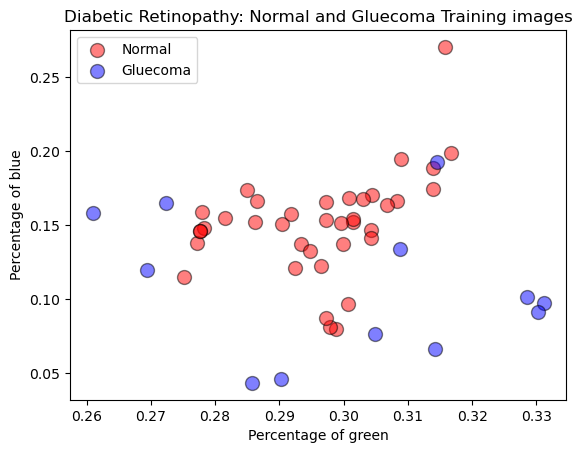

In [33]:
'''
The sample of code creates a scatter plot with matplotlib. The distribution of the mean percentages of the green and blue color channels is shown for both the normal and glaucoma groups. There are two scatter plots produced: 
one with red markers for normal images and one with blue markers for glaucoma photos. 
'''


# plot the graphs
plt.scatter(normal_green, normal_blue, s=100, facecolors='red', edgecolor='black', alpha=0.5)
plt.scatter(glucoma_green, glucoma_blue, s=100, facecolors='blue', edgecolor='black', alpha=0.5)
plt.xlabel('Percentage of green')
plt.ylabel('Percentage of blue')
plt.title('Diabetic Retinopathy: Normal and Gluecoma Training images')
plt.legend(['Normal', 'Gluecoma'])
plt.show()

#### Setup 80-20 train and test data


In [34]:
'''
The first step in this script segment is to import the required libraries and set a random seed (random.seed(42)) to ensure reproducibility. Using random.shuffle(all_images), 
the paths to each image file are shuffled randomly in the all_images array.
'''

import os
import random
import shutil

random.seed(42)
random.shuffle(all_images)

# Setting the random seed for reproducibility

# Shuffling the list of all images


train_size = int(len(all_images) * 0.80)
test_size = int(len(all_images) * 0.20)
print (train_size, test_size)

40 10


#### Move train and test data into respective folder

In [35]:
'''
The script builds a list of picture filenames, checks for image extensions, and sets up destination folders for training and testing images. The image files are copied from the current directory to the appropriate train or test folders, and the destination directories are verified to be present. It also produces a local copy of the training data, 
adding picture filenames to the `training_data} list, for processing later.
'''

dest_path = "data\\"

# Getting the current working directory
data_path = os.getcwd()

train_folder = os.path.join(dest_path, 'train')
test_folder = os.path.join(dest_path, 'test')

image_extensions = ['.JPG']

imgs_list = [filename for filename in os.listdir(data_path) if os.path.splitext(filename)[-1] in image_extensions]

for folder_path in [train_folder, test_folder]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# split into training and testing
training_data = []
for i, f in enumerate(all_images):
    if i < train_size:
        dest_folder = train_folder
    else:
        dest_folder = test_folder
    shutil.copy(os.path.join(data_path, f), os.path.join(data_path,dest_folder))

    #setup training data copy for local processing
    training_data.append(f)

In [36]:
'''
The `training_data} list's image filenames are used to generate the `img_labels} list, which is made up of labels. Using `os.path.splitext(each)[0]}, it eliminates file extensions and then splits the path on backslashes (`\\}) to isolate the label.
A list of labels for each image in the `training_data} list is the end result of this.
'''

img_labels = [os.path.splitext(each)[0].split("\\")[-1] for each in training_data]

In [37]:
'''
After processing `img_labels}, this script generates a list of cleaned labels for training data called `training_labels}. Iterating over `img_labels}, it splits the path on backslashes (`\\}) to isolate the label and removes trailing digits. Together with the total number of labels, 
the cleaned labels for every image in the `training_data} are displayed in the resultant `training_labels} list.
'''

import string
training_labels = []
for i in range(len(img_labels)):
    training_labels.append(img_labels[i].split("\\")[-1].rstrip(string.digits))
print(training_labels, "# of labels: ", len(training_labels))

['normal', 'normal', 'normal', 'normal', 'normal', 'glucoma', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'glucoma', 'glucoma', 'normal', 'normal', 'normal', 'normal', 'glucoma', 'normal', 'normal', 'glucoma', 'glucoma', 'normal', 'normal', 'normal', 'normal', 'glucoma', 'glucoma', 'normal', 'normal', 'glucoma', 'normal', 'glucoma', 'glucoma', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'glucoma', 'normal', 'normal', 'glucoma'] # of labels:  51


#### Now Setup test_data and test_labels

In [38]:
'''
A list of filenames in the test data folder called `test_data} is created by the code segment, which also defines `test` as the path to the test data folder ({'./data/test/'}). Using `os.listdir(test)}, which collects all filenames in the `test} directory, it fills `test_data} with selected filenames.
In order to facilitate subsequent processing or assessment, this produces the test data filenames.
'''
test = './data/test/'
test_data = [filename for filename in os.listdir(test)]

In [39]:
print(test_data)
print (len(test_data))

['glucoma11.JPG', 'glucoma6.JPG', 'normal10.JPG', 'normal14.JPG', 'normal15.JPG', 'normal16.JPG', 'normal17.JPG', 'normal22.JPG', 'normal23.JPG', 'normal25.JPG', 'normal6.JPG']
11


In [40]:
'''
`test_data_noext} is a list of filenames from `test_data} that has had its file extensions deleted thanks to this code. Using `os.path.splitext(each)[0]`, the file extension is eliminated from each filename in `test_data}. The `test_data_noext} 
list that is produced has filenames without extensions that are prepared for additional processing or examination.
'''
test_data_noext = [os.path.splitext(each)[0] for each in test_data]
print(test_data_noext)

['glucoma11', 'glucoma6', 'normal10', 'normal14', 'normal15', 'normal16', 'normal17', 'normal22', 'normal23', 'normal25', 'normal6']


In [41]:
'''
`test_labels` is an empty list created in this script to hold labels for the test data. 
To extract the labels and remove trailing digits, a loop is used to process the filenames in `test_data_noext}.
The resultant label is inserted to the `test_labels} list after `rstrip(string.digits)} eliminates any trailing digits for each filename. This creates a list of labels called `test_labels} that are printed for verification for each image in the test data.
'''
test_labels = []
import string
for i in range(len(test_data_noext)):
    test_labels.append(test_data_noext[i].rstrip(string.digits))
print(test_labels)

['glucoma', 'glucoma', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal']


### KNN Image Processing using RGB data

#### Extract distance metrics from train and test data

In [42]:
training_data_ = np.zeros((len(training_labels),3))

In [43]:
'''
`training_data_}, a matrix holding the color channel percentages for every image, is filled with each iteration of `training_labels} by this code. Using the `normal_red}, `normal_blue}, and `normal_green} lists, the matching red, blue, and green percentages are assigned if the label is `'normal'}. The `glucoma_red}, `glucoma_blue}, and `glucoma_green} lists are used to assign values if the label is `'glucoma'}. The indices for each list are tracked by the loop by updating `glucoma_index} and `normal_index}. To aid in the training of machine learning models, the resulting `training_data_} 
matrix includes color channel percentages for training images.
'''
normal_index = 0
glucoma_index = 0
index=0
for i in range(len(training_labels)-1):
    if training_labels[i] == 'normal':
        training_data_[i,0] = normal_red[normal_index]
        training_data_[i,1] = normal_blue[normal_index]
        training_data_[i,2] = normal_green[normal_index]
        normal_index=normal_index+1
        index = index + 1 
    else:
        #print ("added an element for glucoma", i) 
        
        training_data_[i,0] = glucoma_red[glucoma_index]
        training_data_[i,1] = glucoma_blue[glucoma_index]
        training_data_[i,2] = glucoma_green[glucoma_index]
        glucoma_index=glucoma_index+1
        index = index + 1

In [44]:
test_data_ = np.zeros((len(test_labels),3))    

In [45]:
'''
The test data's normal and glaucoma photos are converted into RGB arrays by this script. Assigning RGB values from lists {normal_red{, `normal_blue}, and `normal_green} if the label is `'normal'}, or from lists {glucoma_red}, {glucoma_blue}, and {glucoma_green} if the label is `'glaucoma'}, 
is done by looping through the `test_labels}.
'''

normal_index = 0
glucoma_index = 0
index=0
for i in range(len(test_labels)-1):
    if test_labels[i] == 'normal':
        test_data_[i,0] = normal_red[normal_index]
        test_data_[i,1] = normal_blue[normal_index]
        test_data_[i,2] = normal_green[normal_index]
        normal_index = normal_index+1
        index = index + 1 
    else:
        #print ("added an element for glucoma", i) 
        test_data_[i,0] = glucoma_red[glucoma_index]
        test_data_[i,1] = glucoma_blue[glucoma_index]
        test_data_[i,2] = glucoma_green[glucoma_index]
        glucoma_index = glucoma_index+1
        index = index + 1

print ("Total =", index)
print ("Normal Entries ", normal_index)
print ("Gluecoma Entries", glucoma_index)

Total = 10
Normal Entries  8
Gluecoma Entries 2


K = 1
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 2
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 3
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 4
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 5
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 6
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 7
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 8
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 9
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 10
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 11
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 12
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 13
Accuracy: 0.909
Confusion Matrix:
[[2 0]
 [1 8]]
-------------------
K = 14
Accuracy: 0.90

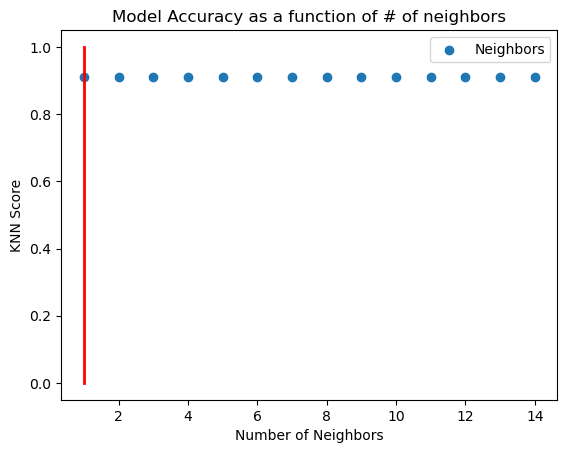

In [46]:
'''
As a function of the number of neighbors (k), a scatter plot is created to show the accuracy of the model. An accuracy baseline of 0.5 (random guessing) is indicated by a red line on the plot, which displays the knn_array scores against the x values (number of neighbors). 
Choose the ideal k value for the KNN classifier with the aid of this visualization.
'''

from sklearn.metrics import confusion_matrix, accuracy_score

x = range(1, 15)
knn_array = [0] * 14
k_pred = [0] * 14

for index, i in enumerate(x):
    k2 = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance')
    k2.fit(training_data_, training_labels)
    k_pred[index] = k2.predict(test_data_)
    score = k2.score(test_data_, test_labels)
    knn_array[index] = round(score, 3)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(test_labels, k_pred[index])

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, k_pred[index])

    # Print accuracy and confusion matrix for each k value
    print(f"K = {i}")
    print("Accuracy:", round(accuracy, 3))
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-------------------")

# Plotting
plt.scatter(x, knn_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('KNN Score')
plt.title('Model Accuracy as a function of # of neighbors')
plt.legend(['Neighbors'])
plt.plot([1, 1], [0, 1], color='red', linestyle='-', linewidth=2)
plt.show()


In [47]:
'''
Observations:

1. I Performed KNN Regression using neighbours 1 through 14
2. The total number of images are 51 
3. I used the training 80% of the 51 that is 40 for training and 20% that is 10/11 images for the testing.
4. All the models achieved 0.909 percentage accuracy 
5. There are 2 true positives (correctly predicted glaucoma) and 8 true negatives (correctly predicted normal).
6. There is 1 false positive (normal images incorrectly predicted as glaucoma) and 0 false negatives (glaucoma images incorrectly predicted as normal).
7. Overall, the model has 10 correct predictions and 1 incorrect prediction.

Since we used only few images for training and testing the accuracy 0.909. If we use more images for training and testing we may get more accurate results.
For all the values of 1 through 14 for neighbour we got same accuracy and confusion matrice.
'''

'\nObservations:\n\n1. I Performed KNN Regression using neighbours 1 through 14\n2. The total number of images are 51 \n3. I used the training 80% of the 51 that is 40 for training and 20% that is 10/11 images for the testing.\n4. All the models achieved 0.909 percentage accuracy \n5. There are 2 true positives (correctly predicted glaucoma) and 8 true negatives (correctly predicted normal).\n6. There is 1 false positive (normal images incorrectly predicted as glaucoma) and 0 false negatives (glaucoma images incorrectly predicted as normal).\n7. Overall, the model has 10 correct predictions and 1 incorrect prediction.\n\nSince we used only few images for training and testing the accuracy 0.909. If we use more \n'